In [98]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import linear_model

import time
import timeit

In [99]:
def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)

In [100]:
# import dataset and convert to numpy array
gaia = pd.read_csv('../data/confirmed_transit.csv', comment='#')
gaia_new = gaia.loc[:,['pl_orbper','pl_bmassj','pl_radj']]
gaia_np = gaia_new.to_numpy()

# standardize gaia data
scaler = StandardScaler()
scaler.fit(gaia_new)
gaia_np_std = scaler.transform(gaia_new)

kmeans = KMeans(n_clusters=2, random_state=0, max_iter = 200).fit(gaia_np_std)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

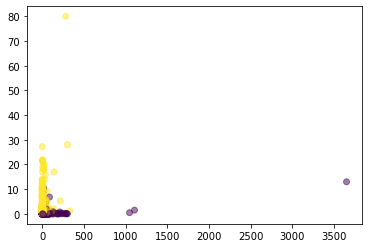

In [101]:
plt.scatter(gaia_np[:,0],gaia_np[:,1],c=labels,alpha = 0.5)

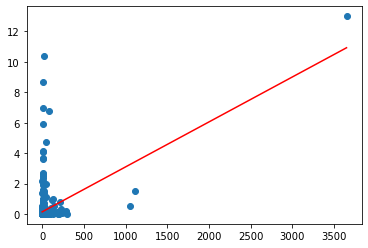

In [104]:
# General x-values for fitting and plotting
x = np.linspace(np.min(gaia_np[labels==0][:,0])-0.1, np.max(gaia_np[labels==0][:,0])+0.1, 1000)
x = np.array([x]).T

x_mat = np.hstack([x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10])

# Create polynomial
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(gaia_np[labels==0][:,0].reshape(-1, 1),gaia_np[labels==0][:,1])

# Create plot of training data with the polynomial
plt.scatter(gaia_np[labels==0][:,0].reshape(-1, 1),gaia_np[labels==0][:,1])

preds1 = model1.predict(x_mat[:,:1].reshape(-1, 1))
plt.plot(x_mat[:,0],preds1, c="r")


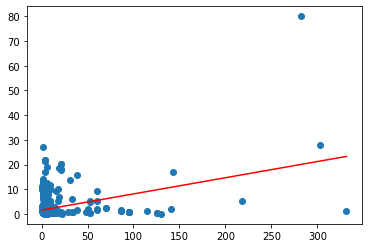

In [105]:
# General x-values for fitting and plotting
x2 = np.linspace(np.min(gaia_np[labels==1][:,0])-0.1, np.max(gaia_np[labels==1][:,0])+0.1, 1000)
x2 = np.array([x2]).T

x_mat2 = np.hstack([x2])
# Create polynomial
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(gaia_np[labels==1][:,0].reshape(-1, 1),gaia_np[labels==1][:,1])

# Create plot of training data with the polynomial
plt.scatter(gaia_np[labels==1][:,0].reshape(-1, 1),gaia_np[labels==1][:,1])

preds2 = model2.predict(x_mat2[:,:1].reshape(-1, 1))
plt.plot(x_mat2[:,0],preds2, c="r")

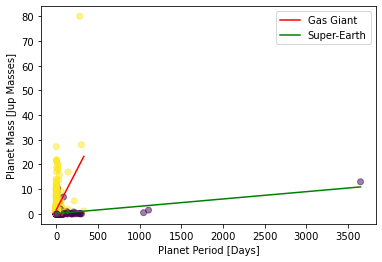

In [106]:
plt.scatter(gaia_np[:,0],gaia_np[:,1],c=labels,alpha = 0.5)
plt.xlabel("Planet Period [Days]")
plt.ylabel("Planet Mass [Jup Masses]")
plt.plot(x_mat2[:,0],preds2, c="r",label="Gas Giant")
plt.plot(x_mat[:,0],preds1, c="g",label="Super-Earth")
plt.legend()